# K-Nearest Neighbors - Oversampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #Import scikit-Tree For Decision Tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import time


D:\Users\sourc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_o = pd.read_csv("../data/processed/data_oversampled.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

# df_n

In [4]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [5]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

numDimensions = X_test.shape[1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31544, 27)
(13520, 27)
(31544,)
(13520,)


In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
accText = 'K-Nearest, Oversampled'

In [9]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("../data/external/accuracies.csv")

  Accuracy: 75.56%
 Precision: 76.30%
    Recall: 74.83%
  F1 score: 75.56%
 ROC score: 75.57%


In [10]:
#Present Confusion Matrix to show accuracy
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[5107 1718]
 [1586 5109]]

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      6695
           1       0.76      0.75      0.76      6825

    accuracy                           0.76     13520
   macro avg       0.76      0.76      0.76     13520
weighted avg       0.76      0.76      0.76     13520



In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
# calculate min, max and limits
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
# np.arange(y_min, y_max, h))

In [12]:
knnvals={}
for i in range(1,26):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knnvals[i]=accuracy
    
dfknn = pd.DataFrame.from_dict(knnvals, orient="index", columns=['acc'])
dfknn

,acc
1,0.883284
2,0.839053
3,0.803698
4,0.781361
5,0.763018
6,0.755621
7,0.744009
8,0.741716
9,0.735577
10,0.730991


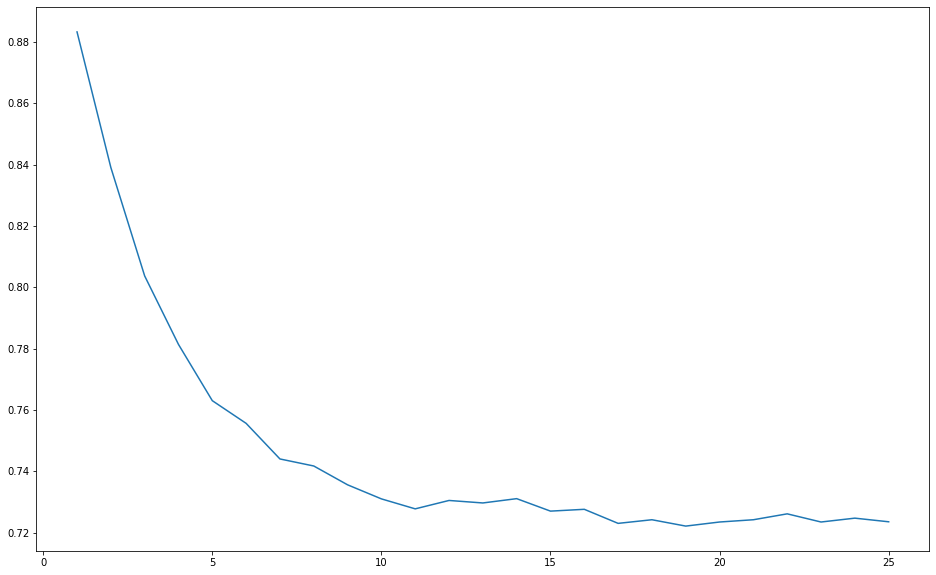

In [13]:
plt.figure(figsize=(16, 10))
plt.plot(dfknn, scalex=range(1,26))
